When training: Runtime / change runtime type  -> GPU

In [55]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

## **EXERCISE 1**

[Kaggles sign-language-mnist-dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code)

bw 28x28-pixel images of hand-gesture alphabets A-Y (without  J),
27455 training- and 7172 test-images.



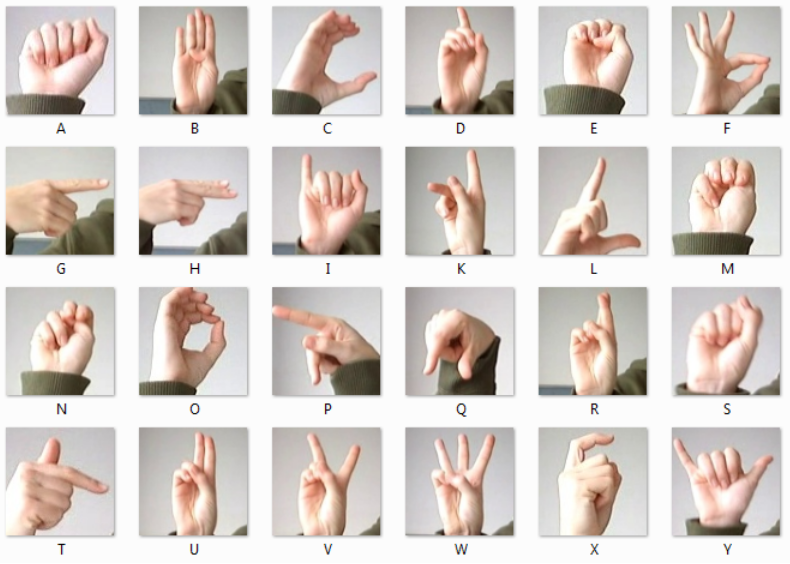







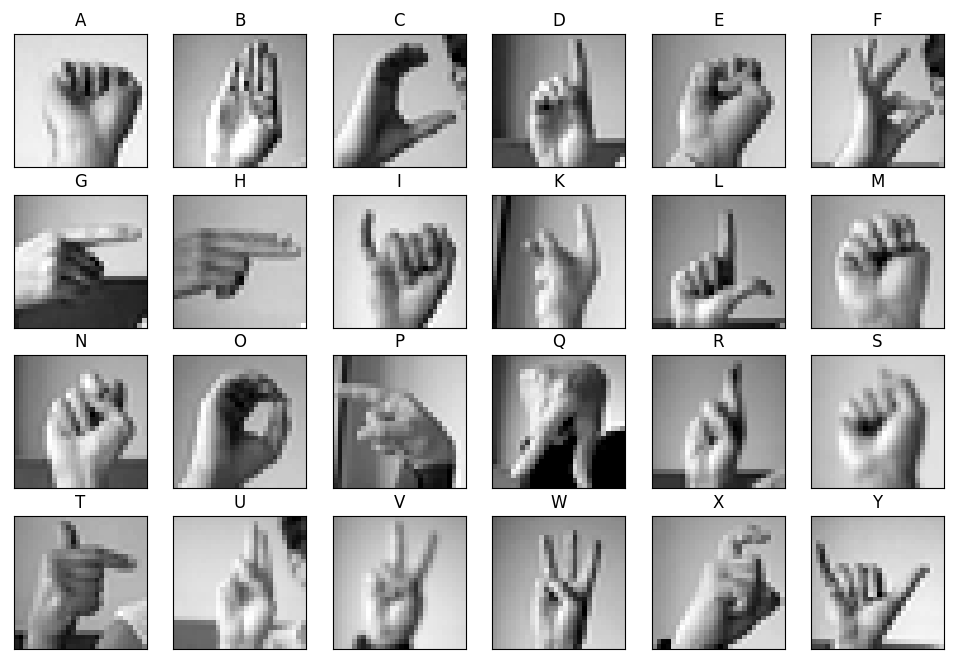




Build and train a CNN (for example like the one below) that achieves 99.5 % test accuracy  

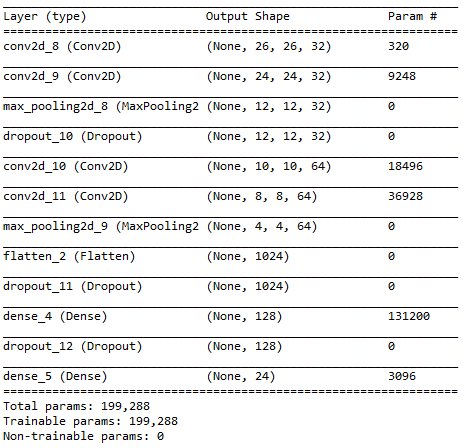

Calculate the predictions for a random test image and draw a picture like below.

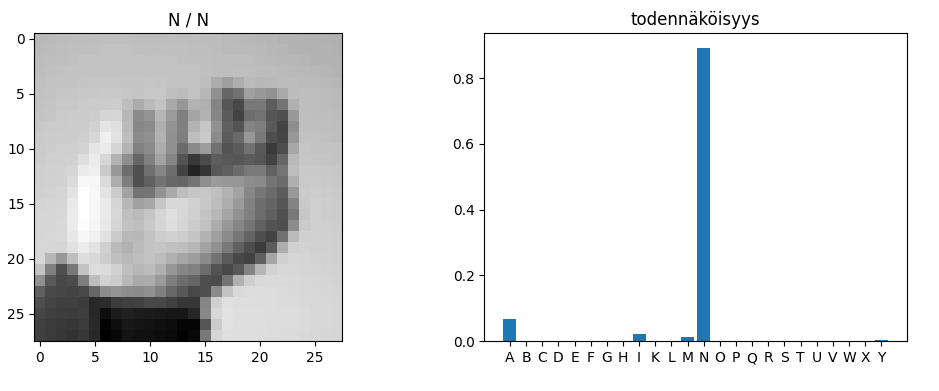

In [ ]:
#load sign_mnist_train.zip (from the folder Neural networks) to drive and mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip to colab
!unzip '/content/drive/MyDrive/sign_mnist.zip' -d '/content'

Archive:  /content/drive/MyDrive/sign_mnist.zip
   creating: /content/sign_mnist/
  inflating: /content/sign_mnist/sign_mnist_test.csv  
  inflating: /content/sign_mnist/sign_mnist_train.csv  


In [ ]:
#read as np.array
train_data=np.loadtxt('sign_mnist/sign_mnist_train.csv',delimiter=',',skiprows=1)
test_data=np.loadtxt('sign_mnist/sign_mnist_test.csv',delimiter=',',skiprows=1)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [ ]:
xtrain=train_data[:,1:]/255.0 #pixels to 0...1
ytrain=train_data[:,0] #classes
xtest=test_data[:,1:]/255.0
ytest=test_data[:,0]


In [ ]:
#images to 3D arrays, shape (28,28,1)
mtrain=xtrain.shape[0]
mtest=xtest.shape[0]
xtrain=xtrain.reshape((mtrain,28,28,1))
xtest=xtest.reshape((mtest,28,28,1))

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


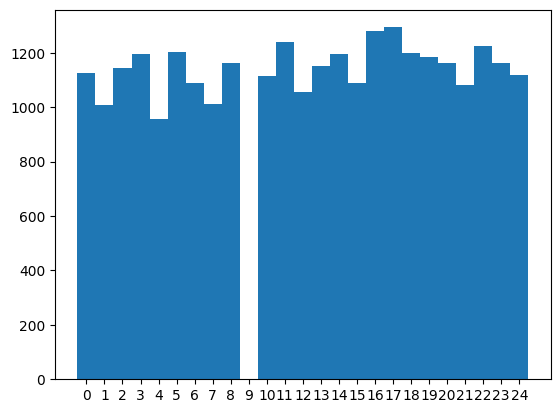

In [ ]:
#distribution of classes
plt.hist(ytrain,bins=np.arange(-0.5,25.5,1))
plt.xticks(np.arange(0,25,1))
plt.show()

In [ ]:
#class y=9 is missing (represents letter J))
#decrease classes 10...24 by one
ytrain[ytrain>9]=ytrain[ytrain>9]-1
ytest[ytest>9]=ytest[ytest>9]-1

Y=['A','B','C','D','E','F','G','H','I','K','L','M',
   'N','O','P','Q','R','S','T','U','V','W','X','Y']

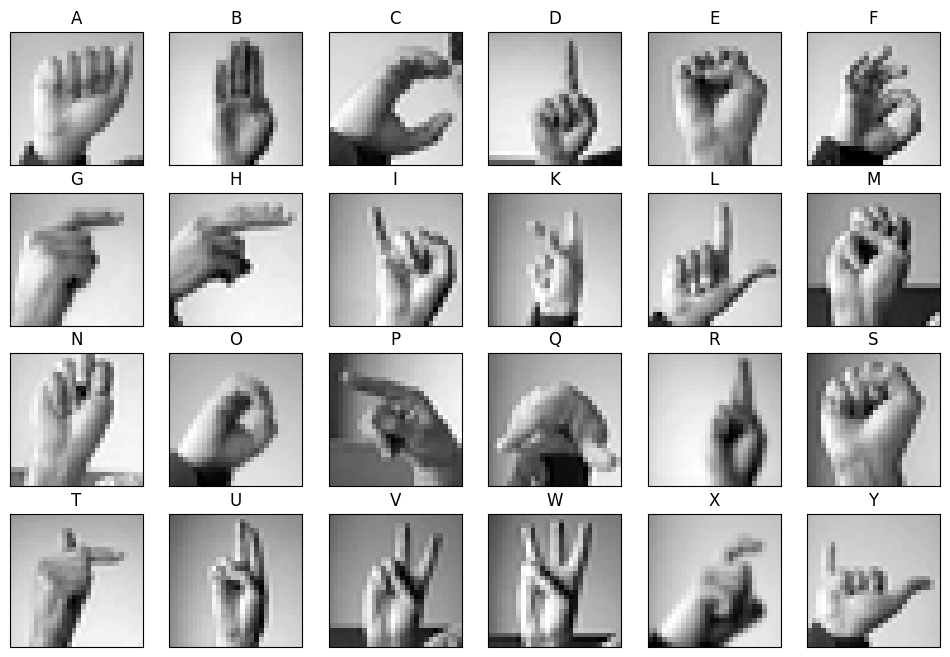

In [ ]:
#example images
plt.figure(figsize=(12,8))
for k in range(24):
    xtraink=xtrain[ytrain==k,:]
    mk=xtraink.shape[0]
    indk=np.random.randint(mk)
    kuvak=xtraink[indk,:].reshape((28,28))
    plt.subplot(4,6,k+1)
    plt.imshow(kuvak, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title(Y[k])

In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
n1=32 #number of filters in the first convolutional layer
n2=64 #number of filters in the second convolutional layer
n3=128 #the number of neurons in the hidden layer
n4=256
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=n4, kernel_size=5, activation='relu'))
model.add(Conv2D(filters=n4, kernel_size=5, activation='relu'))
#default: padding="valid" (padding='same' -> same padding)
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=n3, kernel_size=5,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten()) # -> 1D-array
model.add(Dropout(0.5))
model.add(Dense(n2,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n1,activation='relu'))
model.add(Dense(24,activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 256)         │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 20, 20, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 128)           │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 24)                  │             792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,541,304 (9.69 MB)

 Trainable params: 2,541,304 (9.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.api.optimizers import Adam
model.compile(optimizer=Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain,ytrain,
                  epochs=100,batch_size=256,
                  validation_data=(xtest,ytest))

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.0469 - loss: 3.1666 - val_accuracy: 0.2288 - val_loss: 2.5062
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.3045 - loss: 2.2052 - val_accuracy: 0.6867 - val_loss: 0.9453
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.6181 - loss: 1.1166 - val_accuracy: 0.8585 - val_loss: 0.5079
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.7582 - loss: 0.7025 - val_accuracy: 0.9042 - val_loss: 0.3251
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.8264 - loss: 0.4941 - val_accuracy: 0.9215 - val_loss: 0.2921
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8716 - loss: 0.3798 - val_accuracy: 0.9423 - val_loss: 0.1937
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8941 - loss: 0.3089 - val_accuracy: 0.9304 - val_loss: 0.2100
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9123 - loss: 

In [ ]:
#save the model
model.save('/content/drive/MyDrive/sign_mnist_cnn_model.keras')

In [ ]:
print(xtest.shape, ytest.shape)

(7172, 28, 28, 1) (7172,)


In [ ]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/sign_mnist_cnn_model.keras')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 256)         │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 20, 20, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 128)           │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 24)                  │             792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,623,914 (29.08 MB)

 Trainable params: 2,541,304 (9.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,082,610 (19.39 MB)

In [ ]:
#kustannusfunktion ja tarkkuuden kuvaajat
train_cost = history.history['loss']
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

In [ ]:
train_loss,train_acc=model.evaluate(xtrain,ytrain,verbose=0)
test_loss,test_acc=model.evaluate(xtest,ytest,verbose=0)
print(train_acc)
print(test_acc)

1.0
0.989403247833252


In [ ]:
#testpoint number k
k=np.random.randint(7172)
xt=xtest[k]
yt=ytest[k]
at_pred=model.predict(xt.reshape((1,28,28))) #predicted probabilities, (1,10)-array
yt_pred=np.argmax(at_pred[0,:]) #predicted class
print(at_pred)
print(yt_pred)
print(Y[yt_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
[[7.80917106e-13 3.41804662e-14 8.71862395e-17 1.19202478e-19
  1.39676707e-14 4.18673614e-14 1.08741798e-13 8.32227082e-14
  5.59521311e-17 2.33990258e-11 4.74446191e-19 2.29405897e-14
  4.02997498e-16 9.60712204e-11 1.00000000e+00 4.05554687e-11
  7.14709192e-22 1.11097765e-14 4.44784319e-13 1.12315497e-16
  7.80365593e-22 1.27047574e-11 4.66248481e-12 5.89293442e-15]]
14
P


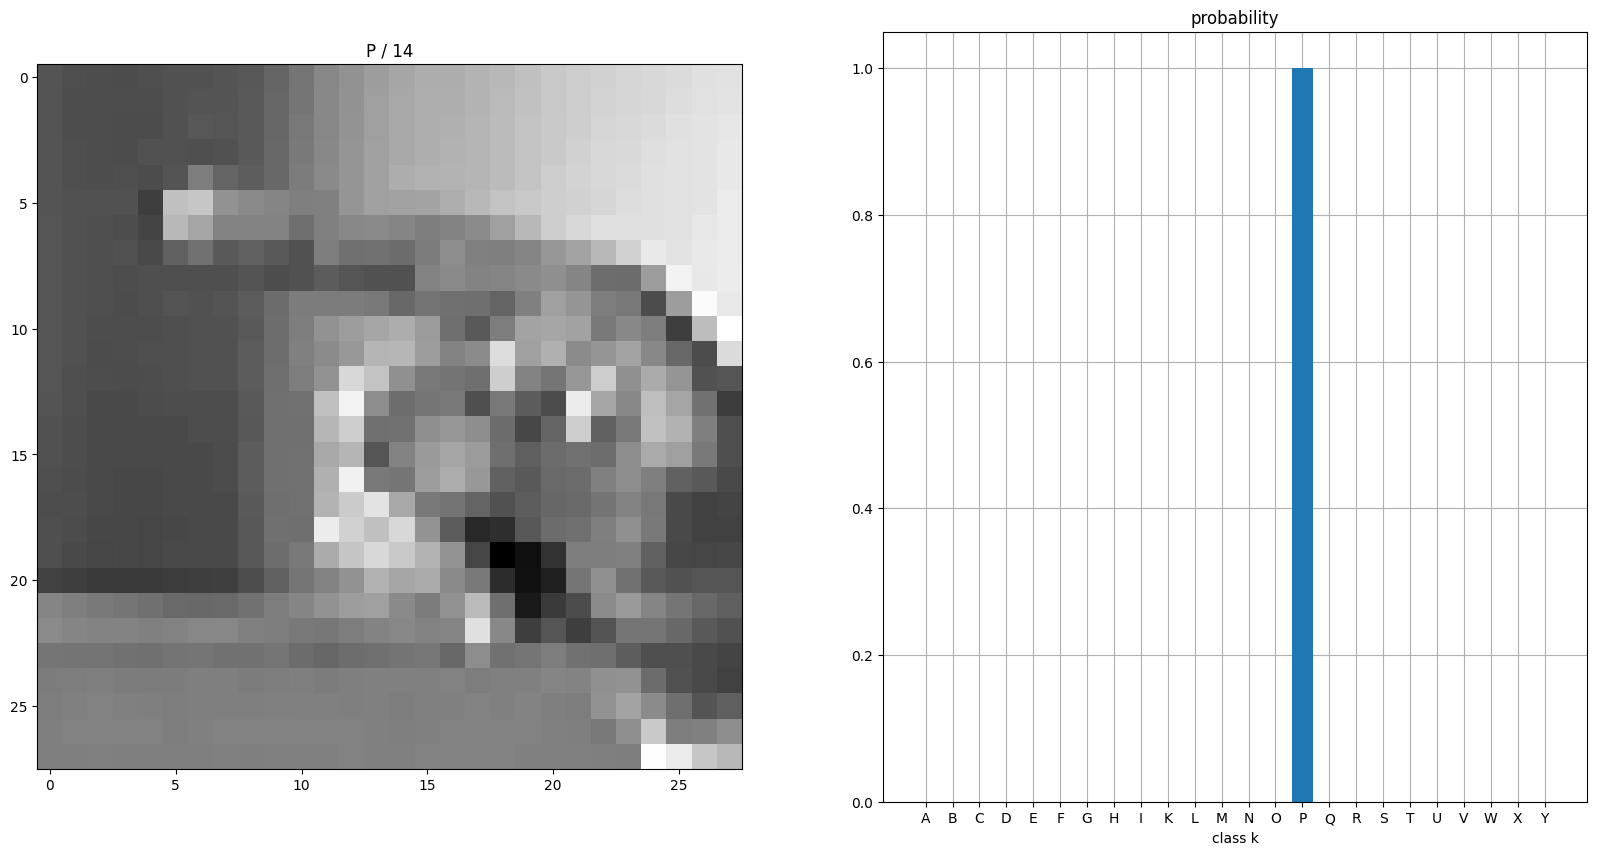

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(xt.reshape((28,28)), cmap = 'gray')
plt.title(f'{Y[int(yt)]} / {yt_pred}')

plt.subplot(1,2,2)
plt.bar(np.linspace(0, 23,24), at_pred[0, :], zorder=2)
plt.xticks(np.linspace(0,23,24),Y)
plt.xlabel('class k')
plt.title('probability')
plt.grid()
plt.show()

## **EXERCISE 2**

[Sign-Language-Digits-Dataset](https://github.com/ardamavi/Sign-Language-Digits-Dataset)

100x100x3 images of hand-gesture numbers 0-9, 1441 training- and 618 test-images.



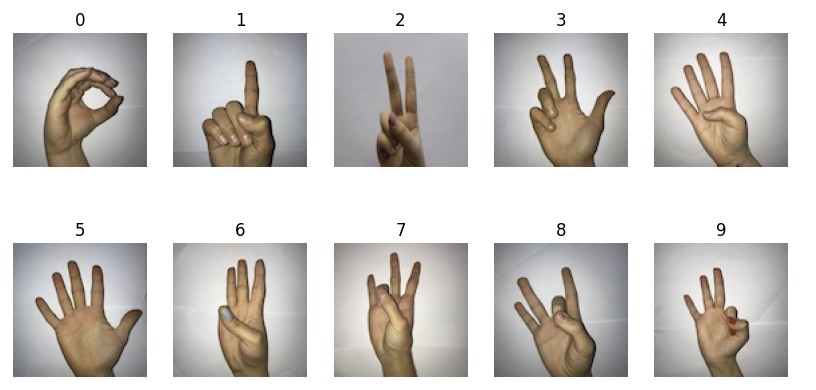

Build and train a CNN (for example like the one below) that achieves 99.5 % test accuracy.

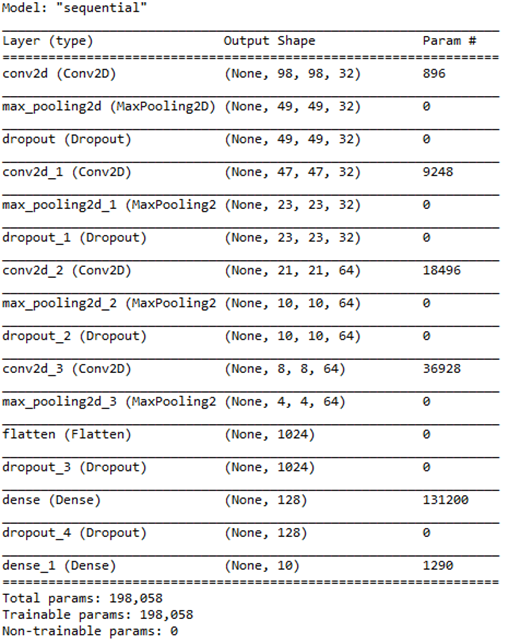

In [ ]:
#load sign_mnist_train.zip (from the folder Neural networks) to drive and mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#get the images
!git clone 'https://github.com/ardamavi/Sign-Language-Digits-Dataset.git'

fatal: destination path 'Sign-Language-Digits-Dataset' already exists and is not an empty directory.


In [ ]:
#number of images
import os
dir='/content/Sign-Language-Digits-Dataset/Dataset'
m=0
for k in range(10):
  dirk=dir+'/'+str(k)
  filenames=os.listdir(dirk)
  m+=len(filenames)
print(m)

2062


In [ ]:
#images to 4D-array X and their classes to 1D-array y
X=np.zeros((m,100,100,3))
y=np.zeros(m)
corrupt=[] #list containing corrupted images (with size different from 100x100x3)
i=0 #number of an image

for k in range(10):
  dirk=dir+'/'+str(k)
  filenames=os.listdir(dirk)
  for filename in filenames:
    path=dirk+'/'+filename
    kuva=plt.imread(path)
    if kuva.shape==(100,100,3):
      X[i]=plt.imread(path)
      y[i]=k
      i+=1
    else:
      corrupt.append(kuva)


In [ ]:
print(m)
print(i)
print(len(corrupt))
corrupt[0].shape

2062
2059
3


(3024, 3024, 3)

In [ ]:
print(X[0].shape)
print(np.max(X[0]))
print(np.min(X[0]))

(100, 100, 3)
249.0
0.0


In [ ]:
y[0]

np.float64(0.0)

In [ ]:
#remove unnecessary zeros
X=X[:i]
y=y[:i]
#pixel values to 0...1
X=X/255.0

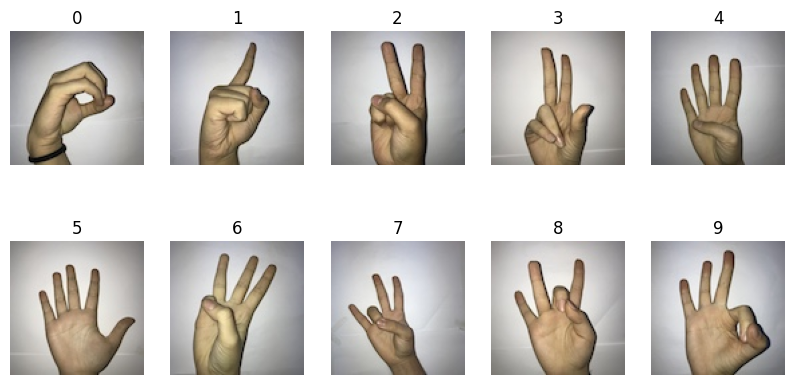

In [ ]:
#example images
plt.figure(figsize=(10,5))
for k in range(10):
  Xk=X[y==k]
  plt.subplot(2,5,k+1)
  plt.imshow(Xk[0])
  plt.axis('off')
  plt.title(str(k))

In [ ]:
#split to training- and test-images
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,stratify=y)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1441, 100, 100, 3)
(618, 100, 100, 3)
(1441,)
(618,)


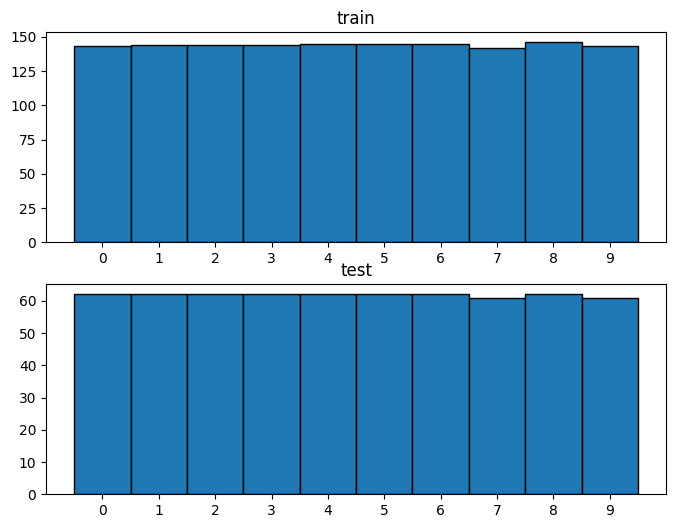

In [ ]:
#distribution of classes
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.hist(ytrain,bins=np.arange(-0.5,10.5,1),edgecolor='k')
plt.xticks(np.arange(0,10,1))
plt.title('train')
plt.subplot(212)
plt.hist(ytest,bins=np.arange(-0.5,10.5,1),edgecolor='k')
plt.xticks(np.arange(0,10,1))
plt.title('test')
plt.show()

In [ ]:
from keras.api.models import Sequential
from keras.api.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.api.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Input(shape=(100,100,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,647,722 (10.10 MB)

 Trainable params: 2,647,722 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.api.optimizers import Adam
model.compile(optimizer=Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(Xtrain.shape, ytrain.shape)
print(np.isnan(Xtrain).any(), np.isnan(ytrain).any())

(1441, 100, 100, 3) (1441,)
False False


In [ ]:
history=model.fit(Xtrain,ytrain,
                  epochs=100,batch_size=1000,
                  validation_data=(Xtest,ytest))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 126s 50s/step - accuracy: 0.1015 - loss: 2.3075 - val_accuracy: 0.1003 - val_loss: 2.3029
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 714ms/step - accuracy: 0.0946 - loss: 2.3109 - val_accuracy: 0.1003 - val_loss: 2.3024
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 718ms/step - accuracy: 0.0929 - loss: 2.3030 - val_accuracy: 0.0987 - val_loss: 2.3021
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - accuracy: 0.1081 - loss: 2.3018 - val_accuracy: 0.0987 - val_loss: 2.3014
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 0.0873 - loss: 2.3008 - val_accuracy: 0.1845 - val_loss: 2.2980
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 710ms/step - accuracy: 0.1127 - loss: 2.2977 - val_accuracy: 0.2492 - val_loss: 2.2878
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - accuracy: 0.1562 - loss: 2.2800 - val_accuracy: 0.2184 - val_loss: 2.2398
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 719ms/step - accuracy: 0.1870 - loss: 2.2279 - val_accuracy: 0.4515 - 

In [ ]:
#save the model
model.save('/content/drive/MyDrive/sign_numerical_cnn_model.keras')

In [ ]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/sign_numerical_cnn_model.keras')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,943,168 (30.30 MB)

 Trainable params: 2,647,722 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,295,446 (20.20 MB)

In [ ]:
#kustannusfunktion ja tarkkuuden kuvaajat
train_cost = history.history['loss']
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

In [ ]:
train_loss,train_acc=model.evaluate(Xtrain,ytrain,verbose=0)
test_loss,test_acc=model.evaluate(Xtest,ytest,verbose=0)
print(train_acc)
print(test_acc)

0.9993060231208801
0.954692542552948


In [ ]:
#testpoint number k
k=np.random.randint(618)
xt=Xtest[k]
yt=ytest[k]
at_pred=model.predict(xt.reshape((1,100,100,3))) #predicted probabilities, (1,10)-array
yt_pred=np.argmax(at_pred[0,:]) #predicted class
print(at_pred)
print(yt_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[3.8517484e-08 7.2999051e-11 1.8590951e-06 6.4788053e-10 7.0567033e-04
  6.6762143e-12 9.9929214e-01 9.6768694e-08 6.3424707e-08 2.0845759e-11]]
6


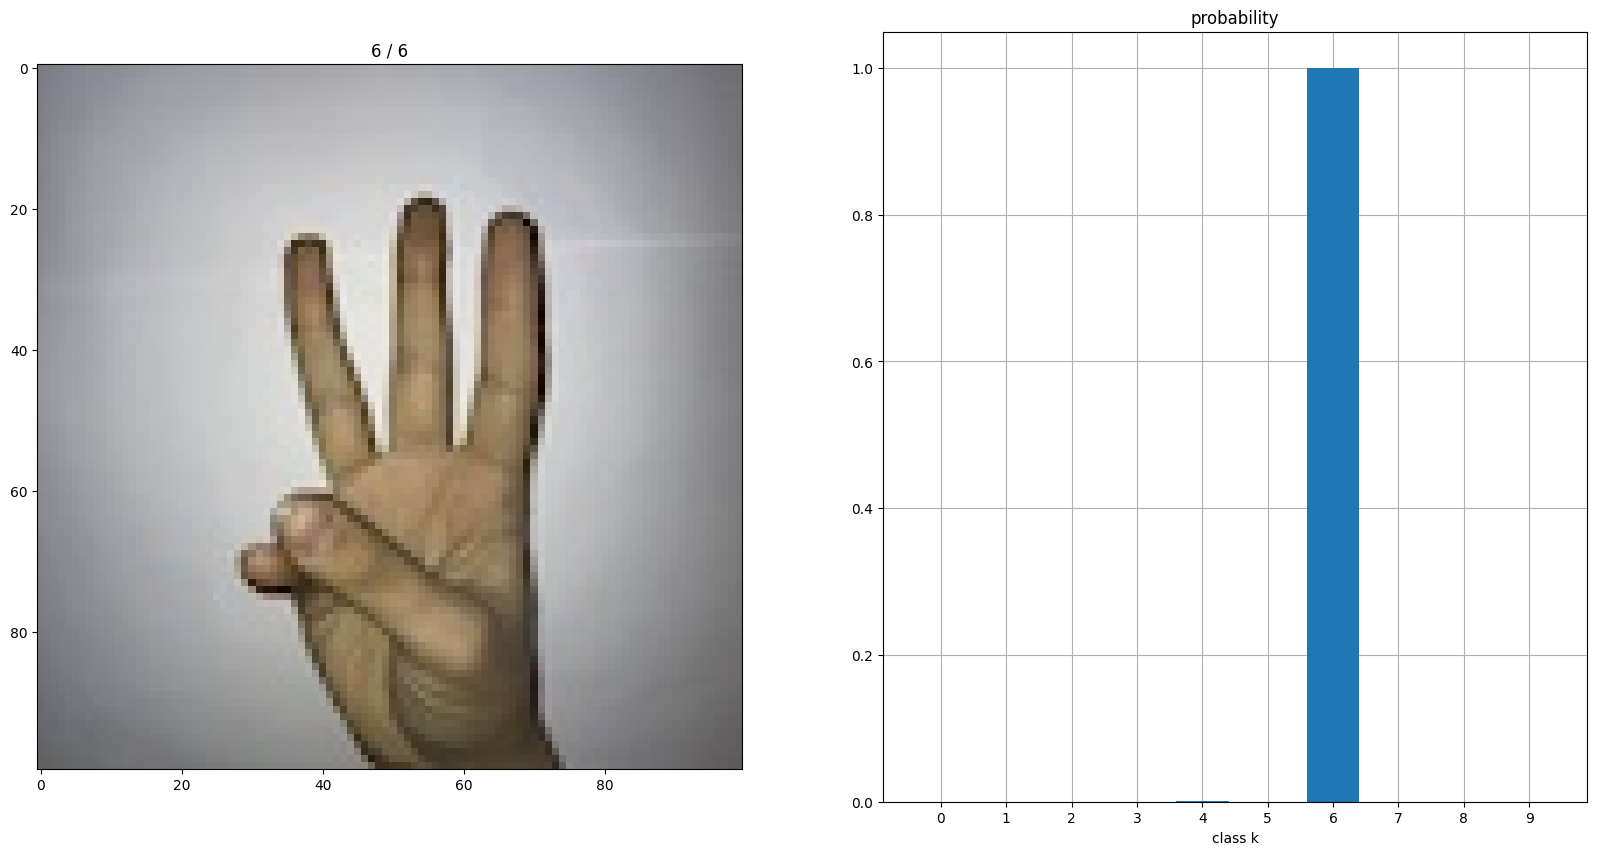

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(xt.reshape((100,100,3)), cmap = 'gray')
plt.title(f'{int(yt)} / {yt_pred}')

plt.subplot(1,2,2)
plt.bar(np.linspace(0, 9,10), at_pred[0, :], zorder=2)
plt.xticks(np.linspace(0,9,10))
plt.xlabel('class k')
plt.title('probability')
plt.grid()
plt.show()

##**EXERCISES 3 and 4**

[Flowers-dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers)

Contains 3670 images of flowers daisy, dandelion, rose, tulip and sunflower,
2570 training- and 1100 test-images.


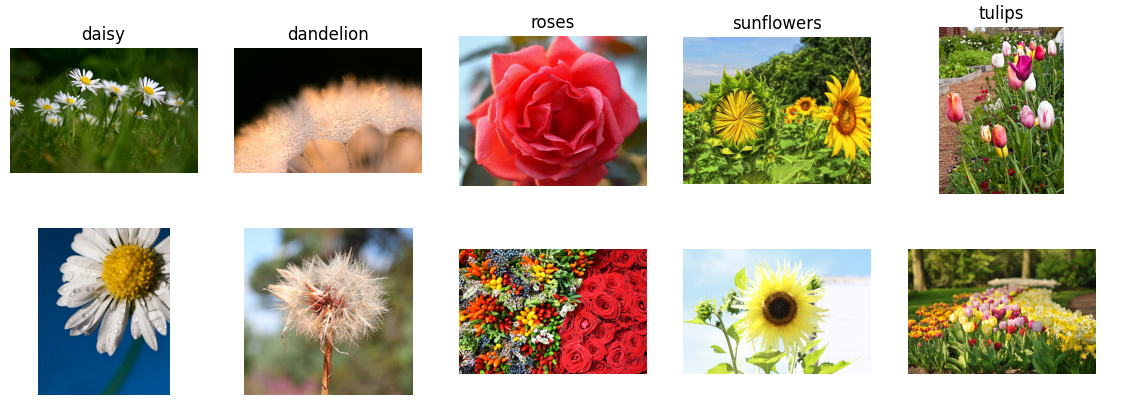

In [56]:
#load sign_mnist_train.zip (from the folder Neural networks) to drive and mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#load flower images
from tensorflow import keras
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_dir = keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

In [58]:
import os
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/flower_photos_extracted
/root/.keras/datasets/flower_photos_extracted/flower_photos
/root/.keras/datasets/flower_photos_extracted/flower_photos/daisy
/root/.keras/datasets/flower_photos_extracted/flower_photos/roses
/root/.keras/datasets/flower_photos_extracted/flower_photos/dandelion
/root/.keras/datasets/flower_photos_extracted/flower_photos/tulips
/root/.keras/datasets/flower_photos_extracted/flower_photos/sunflowers


In [59]:
base_dir = "/root/.keras/datasets/flower_photos_extracted/flower_photos"
base_dir

'/root/.keras/datasets/flower_photos_extracted/flower_photos'

In [6]:
categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
m=np.zeros(5) #number of images in each class

for k in range(5):
  category=categories[k]
  category_dir=os.path.join(base_dir, category)
  m[k]=len(os.listdir(category_dir))


m=m.astype(int)
print(m)
print(sum(m))

[633 898 641 699 799]
3670


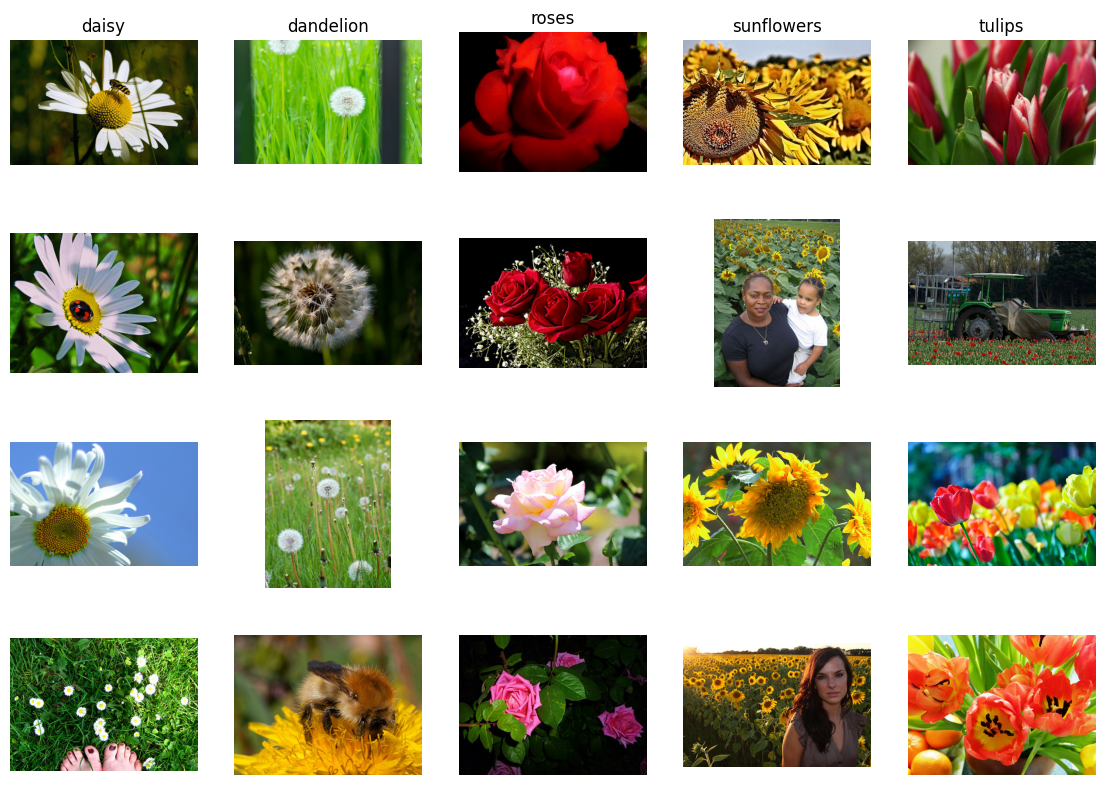

In [8]:
#example images
plt.figure(figsize=(14,10))
for k in range(5):
  category=categories[k]
  flower_folder=os.path.join(base_dir, category)
  flower_names=os.listdir(flower_folder)
  n=np.random.randint(0,m[k],4)
  for i in range(4):
    flower_name=flower_names[n[i]]
    flower_path=os.path.join(flower_folder,flower_name)
    kuva=plt.imread(flower_path)
    plt.subplot(4,5,1+k+i*5)
    plt.imshow(kuva)
    plt.axis('off')
    if i==0:
      plt.title(category)


In [9]:
import shutil

target_dir = '/content/flowers'

# Remove existing directory and create a new one
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)  # Deletes the folder and its contents

#folders for training and test-images

os.mkdir(target_dir)

train_dir = os.path.join(target_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(target_dir, 'test')
os.mkdir(test_dir)

In [10]:
for category in categories:
  category_train_dir=os.path.join(train_dir, category)
  os.mkdir(category_train_dir)
  category_test_dir=os.path.join(test_dir, category)
  os.mkdir(category_test_dir)

In [11]:
print(0.7*m)

[443.1 628.6 448.7 489.3 559.3]


In [12]:
mtrain=[443,629,449,489,560] #number of train-images, ~70 %
print(np.sum(mtrain))
print(mtrain/m)

2570
[0.69984202 0.70044543 0.70046802 0.69957082 0.7008761 ]


In [13]:
import shutil

#split to train and test-images
for k in range(5):
  category=categories[k]
  src_dir=os.path.join(base_dir,category)
  dst_train_dir=os.path.join(train_dir,category)
  dst_test_dir=os.path.join(test_dir,category)
  fnames=os.listdir(src_dir)
  rp=np.random.permutation(m[k])
  for n in range(m[k]):
    fname=fnames[rp[n]]
    src = os.path.join(src_dir, fname)
    if n<mtrain[k]:
        dst = os.path.join(dst_train_dir, fname)
    else:
        dst = os.path.join(dst_test_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
for category in categories:
  tr_dir=os.path.join(train_dir,category)
  tr=os.listdir(tr_dir)
  te_dir=os.path.join(test_dir,category)
  te=os.listdir(te_dir)
  print(category +': train ' + str(len(tr)) + ', test ' + str(len(te)))

daisy: train 443, test 190
dandelion: train 629, test 269
roses: train 449, test 192
sunflowers: train 489, test 210
tulips: train 560, test 239


###**EXERCISE 3**


Build and train a CNN that achieves 80% test accuracy.

Use image size 150x150 and data augmentation.

In [15]:
from keras.api.utils import image_dataset_from_directory

#size of images
img_height=150
img_width=150
#batch size
batch_size=32

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 2570 files belonging to 5 classes.
Found 1100 files belonging to 5 classes.


data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


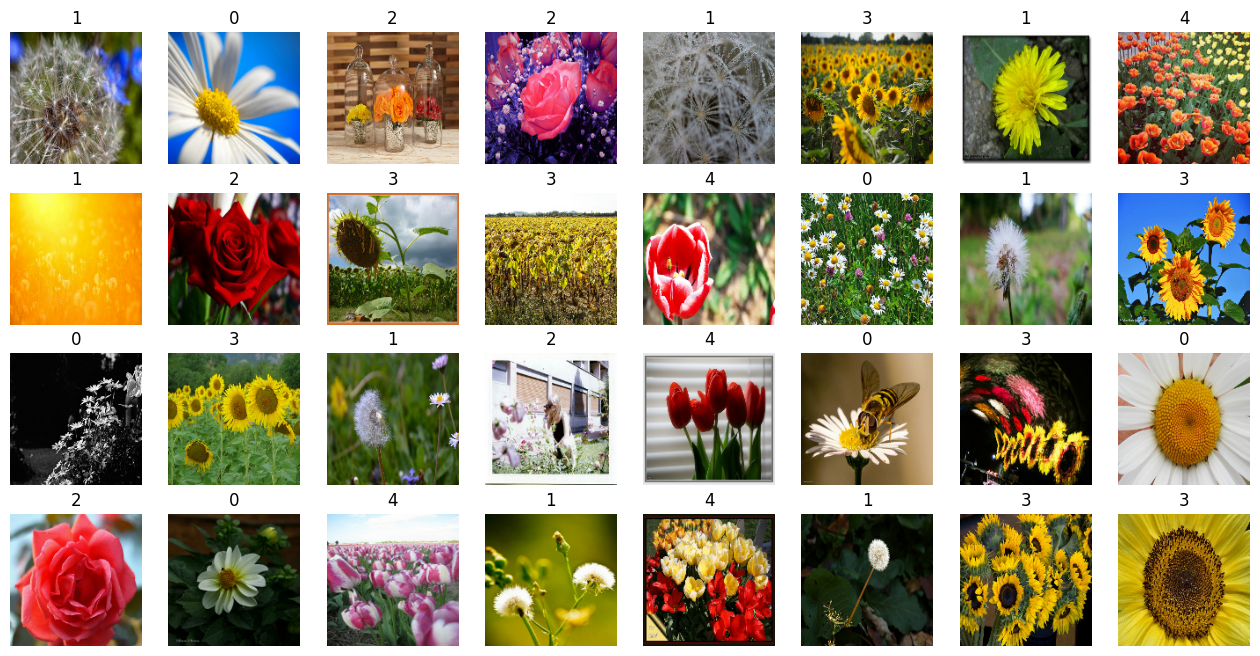

In [16]:
#one batch of training-images
for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  plt.figure(figsize=(16,8))
  for k in range(batch_size):
    plt.subplot(4,8,k+1)
    plt.imshow(data_batch[k]/255.0) #pixel values to 0...1
    plt.axis('off')
    plt.title(int(labels_batch[k]))
  break

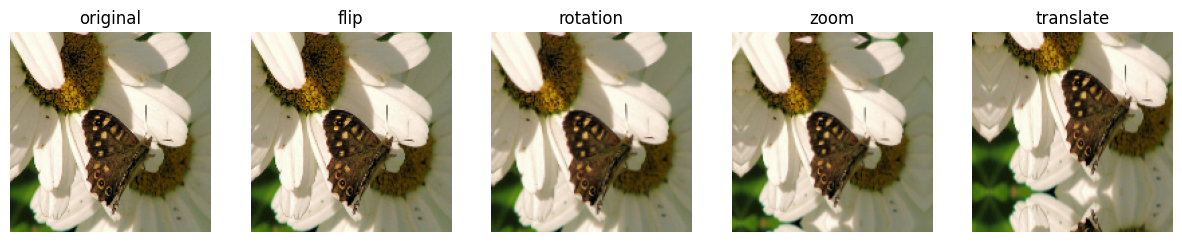

In [17]:
from keras.api.layers import RandomFlip, RandomRotation,RandomZoom, RandomTranslation
flip=RandomFlip('horizontal') #flip horizontally (with 50 % probability)
rotate=RandomRotation(0.1) #rotate with random angle -0.1...0.1 *360 degrees
zoom=RandomZoom(0.3) #zoom with random factor -0.3...0.3
translate=RandomTranslation(height_factor=0.2, width_factor=0.2)#translate with random amount -20%...+20% vertically and horizontally

for data_batch, labels_batch in train_dataset:
  image=data_batch[0]/255.0 #pixel values 0...1
  flipped=flip(image)
  rotated=rotate(image)
  zoomed=zoom(image)
  translated=translate(image)

  plt.figure(figsize=(15,3))
  plt.subplot(1,5,1)
  plt.imshow(image)
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,5,2)
  plt.imshow(flipped)
  plt.axis('off')
  plt.title('flip')
  plt.subplot(1,5,3)
  plt.imshow(rotated)
  plt.axis('off')
  plt.title('rotation')
  plt.subplot(1,5,4)
  plt.imshow(zoomed)
  plt.axis('off')
  plt.title('zoom')
  plt.subplot(1,5,5)
  plt.imshow(translated)
  plt.axis('off')
  plt.title('translate')
  break


In [18]:
#layer for data-augmentation
from keras.api.models import Sequential
Data_augmentation = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.2),
        RandomTranslation(0.2,0.2)])

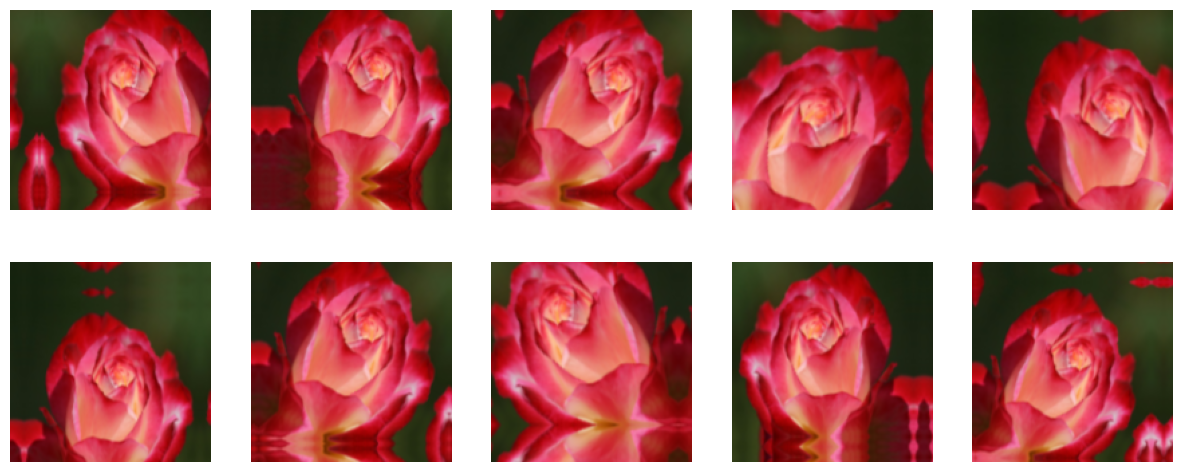

In [19]:
#10 random augmentations for an example image
plt.figure(figsize=(15,6))
for images, labels in train_dataset:
    for i in range(10):
        augmented_images = Data_augmentation(images)
        plt.subplot(2,5,i+1)
        plt.imshow(augmented_images[0]/255.0)
        plt.axis("off")
    break

In [20]:
from keras.api.models import Sequential
from keras.api.layers import Input,Rescaling,Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [21]:
model = Sequential()
model.add(Input(shape=(img_height,img_width,3)))
model.add(Rescaling(1/255.0)) #pixel values to 0...1
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 74, 74, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 754,117 (2.88 MB)

 Trainable params: 754,117 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from keras.api.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_dataset,
      epochs=50,
      validation_data=test_dataset)

In [ ]:
#save the model
model.save('/content/drive/MyDrive/flower_cnn_model_f.keras')

In [62]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/flower_cnn_model_f.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 74, 74, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,262,353 (8.63 MB)

 Trainable params: 754,117 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,508,236 (5.75 MB)

In [ ]:
#kustannusfunktion ja tarkkuuden kuvaajat
train_cost = history.history['loss']
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

In [25]:
train_loss,train_acc=model.evaluate(train_dataset,verbose=0)
test_loss,test_acc=model.evaluate(test_dataset,verbose=0)
print(train_acc)
print(test_acc)

0.9260700345039368
0.9200000166893005


/content/flowers/test/sunflowers
['5970301989_fe3a68aac8_m.jpg', '4414084638_03d2db38ae.jpg', '164671753_ab36d9cbb7_n.jpg', '5979111025_3bcae48ae6_n.jpg', '3893436870_034b79d118_n.jpg', '210076535_80951bc5d5.jpg', '9699724719_a8439cc0fd_n.jpg', '12471441503_d188b5f31a_m.jpg', '15218871222_c104032ca1.jpg', '3848405800_8eea982c40.jpg', '9484354480_07ff2ef0a6.jpg', '3466923719_b4b6df7f8b_n.jpg', '253586685_ee5b5f5232.jpg', '6606813305_c992231d29_m.jpg', '21995435890_e5672244a4_m.jpg', '15495579081_661cb260d1_n.jpg', '5970300143_36b42437de_n.jpg', '15072973261_73e2912ef2_n.jpg', '9427945592_07a2676945_n.jpg', '4186808407_06688641e2_n.jpg', '22419079265_8902cddb7d_n.jpg', '4933230991_d50c0f7c66.jpg', '9610373158_5250bce6ac_n.jpg', '4932144003_cbffc89bf0.jpg', '145303599_2627e23815_n.jpg', '15054864058_2edca122a9_n.jpg', '14460075029_5cd715bb72_m.jpg', '9825716455_f12bcc8d4e_n.jpg', '184682652_c927a49226_m.jpg', '7510240282_87554c7418_n.jpg', '3815322974_52c12dbde3.jpg', '164668737_aeab0cb55

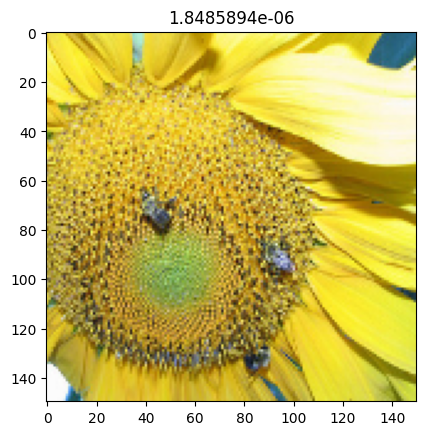

In [60]:
img_height=150
img_width=150
import cv2
dir_name=test_dir
fnames=os.listdir(dir_name)
mdir=len(fnames)
k=np.random.randint(mdir)
fname=fnames[k]
fpath = os.path.join(dir_name,fname)
print(fpath)

import os

# List all filenames in the parent directory
filenames = os.listdir(fpath)

print(filenames)
print(len(filenames))
print(filenames[0])

import random
random_index = random.randint(0,len(filenames)-1)
image = plt.imread(os.path.join(fpath, filenames[random_index]))
image_rs = cv2.resize(image,(img_height,img_width)) #to size (150,150,3)
pred=model.predict(image_rs.reshape((1,150,150,3)),verbose=0)
print(pred)
plt.imshow(image_rs)
plt.title(pred[0,0])
plt.show()

In [69]:
pred=pred.flatten()
max_index_pred = np.argmax(pred)
print(categories[max_index_pred])

sunflowers


###**EXERCISE 4**

Build and train a neural net using VGG16 that achieves 89 % test accuracy.

In [70]:
from keras.api.applications import VGG16

In [80]:
model = VGG16(include_top=True,weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [81]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
#convolutional layers
conv_base = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from keras.api.applications.vgg16 import decode_predictions, preprocess_input

#preprocess_input = subtract the mean RGB value, computed on the training set, from each pixel.

In [72]:
test_dir

'/content/flowers/test'

In [78]:
dir_name = '/root/.keras/datasets/flower_photos_extracted/flower_photos'

# List all directories, subdirectories, and files
for root, dirs, files in os.walk(dir_name):
    print(f"Current directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("=" * 40)

Current directory: /root/.keras/datasets/flower_photos_extracted/flower_photos
Subdirectories: ['daisy', 'roses', 'dandelion', 'tulips', 'sunflowers']
Files: ['LICENSE.txt']
Current directory: /root/.keras/datasets/flower_photos_extracted/flower_photos/daisy
Subdirectories: []
Files: ['835750256_3f91a147ef_n.jpg', '519880292_7a3a6c6b69.jpg', '176375506_201859bb92_m.jpg', '12193032636_b50ae7db35_n.jpg', '2611119198_9d46b94392.jpg', '175106495_53ebdef092_n.jpg', '13826249325_f61cb15f86_n.jpg', '4511693548_20f9bd2b9c_m.jpg', '14245834619_153624f836.jpg', '2481823240_eab0d86921.jpg', '5512287917_9f5d3f0f98_n.jpg', '171972704_389cf7a953.jpg', '10172379554_b296050f82_n.jpg', '4407065098_ef25f1ccac_n.jpg', '2498632196_e47a472d5a.jpg', '515112668_a49c69455a.jpg', '3750250718_eb61146c5f.jpg', '476856232_7c35952f40_n.jpg', '5623010186_796ca8d29a.jpg', '3773181799_5def396456.jpg', '476857510_d2b30175de_n.jpg', '8983779970_9d3a6a3bf2_n.jpg', '9146733107_98b15d3892_m.jpg', '21626652132_97e1318bb8_m

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


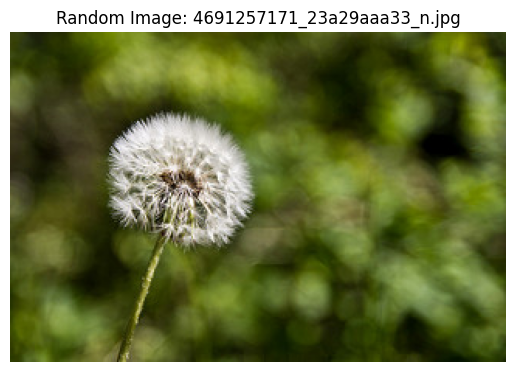

Selected Image Path: /root/.keras/datasets/flower_photos_extracted/flower_photos/dandelion/4691257171_23a29aaa33_n.jpg
(1, 1000)
[('n07730033', 'cardoon', np.float32(0.31253722)), ('n07734744', 'mushroom', np.float32(0.07352432)), ('n11939491', 'daisy', np.float32(0.052718457)), ('n12998815', 'agaric', np.float32(0.04255789)), ('n12768682', 'buckeye', np.float32(0.025994284)), ('n02319095', 'sea_urchin', np.float32(0.019421827)), ('n03445777', 'golf_ball', np.float32(0.015610573)), ('n13044778', 'earthstar', np.float32(0.014214002)), ('n02130308', 'cheetah', np.float32(0.014031205)), ('n13040303', 'stinkhorn', np.float32(0.013957787))]
('n07730033', 'cardoon', np.float32(0.31253722))
cardoon
0.31253722


In [82]:
#VGG16 prediction to an example image
import cv2
import random
# Directory containing images (and subfolders)
dir_name = "/root/.keras/datasets/flower_photos_extracted/flower_photos/"

# Collect all image file paths
image_paths = []
for root, _, files in os.walk(dir_name):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Filter only image files
            image_paths.append(os.path.join(root, file))

# Select a random image
if not image_paths:
    print("No images found!")
else:
    random_image_path = random.choice(image_paths)

    # Load and display the image
    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    #for the model to predict
    image_rs = cv2.resize(image,(224,224)) # -> (224,224,3)
    image_pp = preprocess_input(image_rs)
    pred=model.predict(image_pp.reshape((1,224,224,3)),verbose=0) #1000 probabilities
    label = decode_predictions(pred,top=10)[0] #10 largest probabilities and corresponding classes

    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Random Image: {os.path.basename(random_image_path)}")
    plt.show()

    print("Selected Image Path:", random_image_path)
    print(pred.shape)
    print(label)
    print(label[0])
    print(label[0][1])
    print(label[0][2])




In [76]:
fnames=os.listdir(dir_name)
print(fnames)

['daisy', 'roses', 'dandelion', 'tulips', 'sunflowers']


In [73]:
#read batches of images from folders to size 224x224
from keras.api.utils import image_dataset_from_directory

#image size
img_height=224
img_width=224
#batch size
batch_size=20

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    shuffle=False)

Found 2570 files belonging to 5 classes.
Found 1100 files belonging to 5 classes.


In [74]:
print(train_dataset)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [83]:
#calculate the 7*7*512=25088 coordinates of train- and test-images from the convolutional layers of VGG16
train_features=np.zeros((2570,7*7*512))
train_labels=np.zeros(2570)
test_features=np.zeros((1100,7*7*512))
test_labels=np.zeros(1100)
i=0
for images,labels in train_dataset:
  preprocessed_images = preprocess_input(images)
  features = conv_base.predict(preprocessed_images,verbose=0)
  train_features[i*batch_size:(i+1)*batch_size,:]=features.reshape((batch_size,7*7*512))
  train_labels[i*batch_size:(i+1)*batch_size]=labels
  i+=1
  if i==120: #100*20=2000 training-images
    break

i=0
for images,labels in test_dataset:
  preprocessed_images = preprocess_input(images)
  features = conv_base.predict(preprocessed_images,verbose=0)
  test_features[i*batch_size:(i+1)*batch_size,:]=features.reshape((batch_size,7*7*512))
  test_labels[i*batch_size:(i+1)*batch_size]=labels
  i+=1
  if i==55: #50*20=1000 test-images
    break


In [119]:
#dense neural net for classification
from keras.api.models import Sequential
from keras.api.layers import Input, Dense, Dropout

model = Sequential()
model.add(Input(shape=(25088,)))
model.add(Dropout(rate=0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,522,117 (24.88 MB)

 Trainable params: 6,522,117 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
from keras.api.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [121]:
from keras.api.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath='/content/drive/MyDrive/flowers_VGG16_v1.weights.h5',
                               monitor='val_accuracy',
                               save_weights_only=True,
                               save_best_only=True,
                               verbose=1)

In [122]:
history = model.fit(
      train_features,train_labels,
      batch_size=20,
      epochs=100,
      validation_data=(test_features,test_labels),
      callbacks=[callback])

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5073 - loss: 6.0039
Epoch 1: val_accuracy improved from -inf to 0.76909, saving model to /content/drive/MyDrive/flowers_VGG16_v1.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.5081 - loss: 5.9818 - val_accuracy: 0.7691 - val_loss: 0.7795
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7332 - loss: 0.9781
Epoch 2: val_accuracy did not improve from 0.76909
129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.7333 - loss: 0.9773 - val_accuracy: 0.7464 - val_loss: 0.6284
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8319 - loss: 0.5655
Epoch 3: val_accuracy improved from 0.76909 to 0.82273, saving model to /content/drive/MyDrive/flowers_VGG16_v1.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.8319 - loss: 0.5655 - val_accuracy: 0.8227 - val_loss: 0.5049
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8676 - loss: 0.

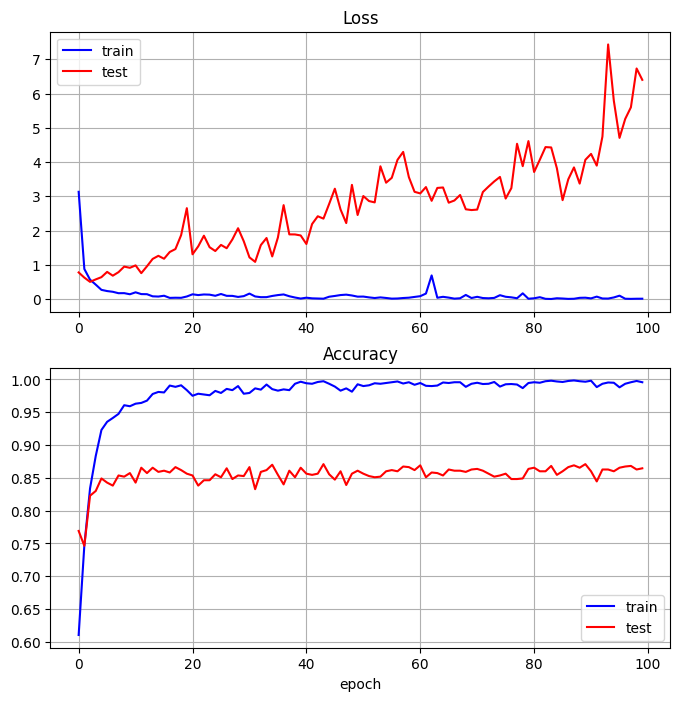

In [128]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], color='b', label='train')
plt.plot(history.history['val_loss'], color='r', label='test')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='b', label='train')
plt.plot(history.history['val_accuracy'], color='r', label='test')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.show()

In [124]:
model.load_weights('/content/drive/MyDrive/flowers_VGG16_v1.weights.h5')

print(model.evaluate(train_features,train_labels,verbose=0))
print(model.evaluate(test_features,test_labels,verbose=0))

[2.954951128231187e-07, 1.0]
[2.3495235443115234, 0.8709090948104858]


In [125]:
#save model
model.save('/content/drive/My Drive/flowers_VGG16_v1.keras')

In [126]:
#load later
from keras.api.models import load_model
model=load_model('/content/drive/My Drive/flowers_VGG16_v1.keras')

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,566,353 (74.64 MB)

 Trainable params: 6,522,117 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,044,236 (49.76 MB)

/content/flowers/test/roses
['512694812_48ba9c0b49_n.jpg', '5526964611_76ef13025c_n.jpg', '3074406590_91c697c805_n.jpg', '18563353954_b761d97155_m.jpg', '9159362388_c6f4cf3812_n.jpg', '4998708839_c53ee536a8_n.jpg', '9609569441_eeb8566e94.jpg', '9338237628_4d2547608c.jpg', '6867597533_d65d1c39fb_n.jpg', '6347847065_83cf87333b_n.jpg', '3052753519_d087aaeacb_n.jpg', '3713368809_eba7fa2fbf_m.jpg', '8032328803_30afac8b07_m.jpg', '16670921315_0fc48d7ab2_n.jpg', '3415176946_248afe9f32.jpg', '6783408274_974796e92f.jpg', '5736328472_8f25e6f6e7.jpg', '1461381091_aaaa663bbe_n.jpg', '16229215579_e7dd808e9c.jpg', '7186509956_c37c02fb43_n.jpg', '8723767157_c45bfd3ab6.jpg', '2265579414_2e00a8f265_n.jpg', '4504220673_af754fcb40_n.jpg', '5398974188_799753449c.jpg', '7865295712_bcc94d120c.jpg', '14494590921_3bb1dc7b88_n.jpg', '2423565102_2f1a00bb1b_n.jpg', '6053143173_991c011b23.jpg', '99383371_37a5ac12a3_n.jpg', '3654988152_b11178bbcb.jpg', '3667366832_7a8017c528_n.jpg', '7316409504_7cf3707f8a_m.jpg', 

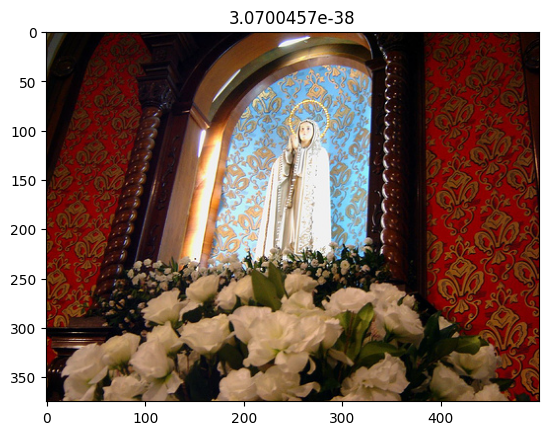

In [129]:
img_height=224
img_width=224
import cv2
dir_name=test_dir
fnames=os.listdir(dir_name)
mdir=len(fnames)
k=np.random.randint(mdir)
fname=fnames[k]
fpath = os.path.join(dir_name,fname)
print(fpath)

import os

# List all filenames in the parent directory
filenames = os.listdir(fpath)

print(filenames)
print(len(filenames))
print(filenames[0])

import random
random_index = random.randint(0,len(filenames)-1)
image = plt.imread(os.path.join(fpath, filenames[random_index]))
image_rs = cv2.resize(image,(img_height,img_width)) #to size (150,150,3)
image_pp = preprocess_input(image_rs)
features = conv_base.predict(image_pp.reshape((1,224,224,3)),verbose=0)
apred=model.predict(features.reshape((1,25088)),verbose=0)
print(apred)
plt.imshow(image)
plt.title(apred[0,0])
plt.show()

In [132]:
max_index_pred = np.argmax(apred)
print(categories[max_index_pred])

roses
